<a href="https://colab.research.google.com/github/YashwantRaul/Supervised-ML-Classification/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

#**Importing Libraries and Loading Dataset**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#file path reading or csv upload to coolab from drive (seperated = ;)
file_path='/content/drive/MyDrive/Almabetter/Capstone Project/Project3-Supervised ML(Classification)/Bank Marketing Effectiveness Prediction-Yashwant Raul/bank-full.csv'     
data=pd.read_csv(file_path, sep = ";")

#**Exploring Dataset And Understanding More About The Data**

In [14]:
#checking top 5 rows of dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### We can see that all columns are in proper format in our dataset. so we dont need to do Formating.

In [17]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


###**Handling missing and duplicate values**

In [18]:
#checking null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

###There are no null values in the given dataset.

In [19]:
#check for duplicate rows
data.duplicated().value_counts()

False    45211
dtype: int64

###There are no duplicate row in our dataset.

In [20]:
#creating copy of dataset before working with it so that we can have original data untouched
df = data.copy()

###**Check columns and their Unique Values**

In [21]:
#check the column names 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
for column in df.columns:
  print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


#**Exploratory Data Analysis Of Dataset** 

##**Analysis Of Categorical Features**

In [42]:
categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [43]:
for feature in categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))  

the feature is job and number of categories are 12
the feature is marital and number of categories are 3
the feature is education and number of categories are 4
the feature is default and number of categories are 2
the feature is housing and number of categories are 2
the feature is loan and number of categories are 2
the feature is contact and number of categories are 3
the feature is month and number of categories are 12
the feature is poutcome and number of categories are 4
the feature is y and number of categories are 2


### There are 9 Categorical features.
### Job and Month has more categorical values.

In [44]:
df[categorical_features].head(10)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no
6,management,single,tertiary,no,yes,yes,unknown,may,unknown,no
7,entrepreneur,divorced,tertiary,yes,yes,no,unknown,may,unknown,no
8,retired,married,primary,no,yes,no,unknown,may,unknown,no
9,technician,single,secondary,no,yes,no,unknown,may,unknown,no


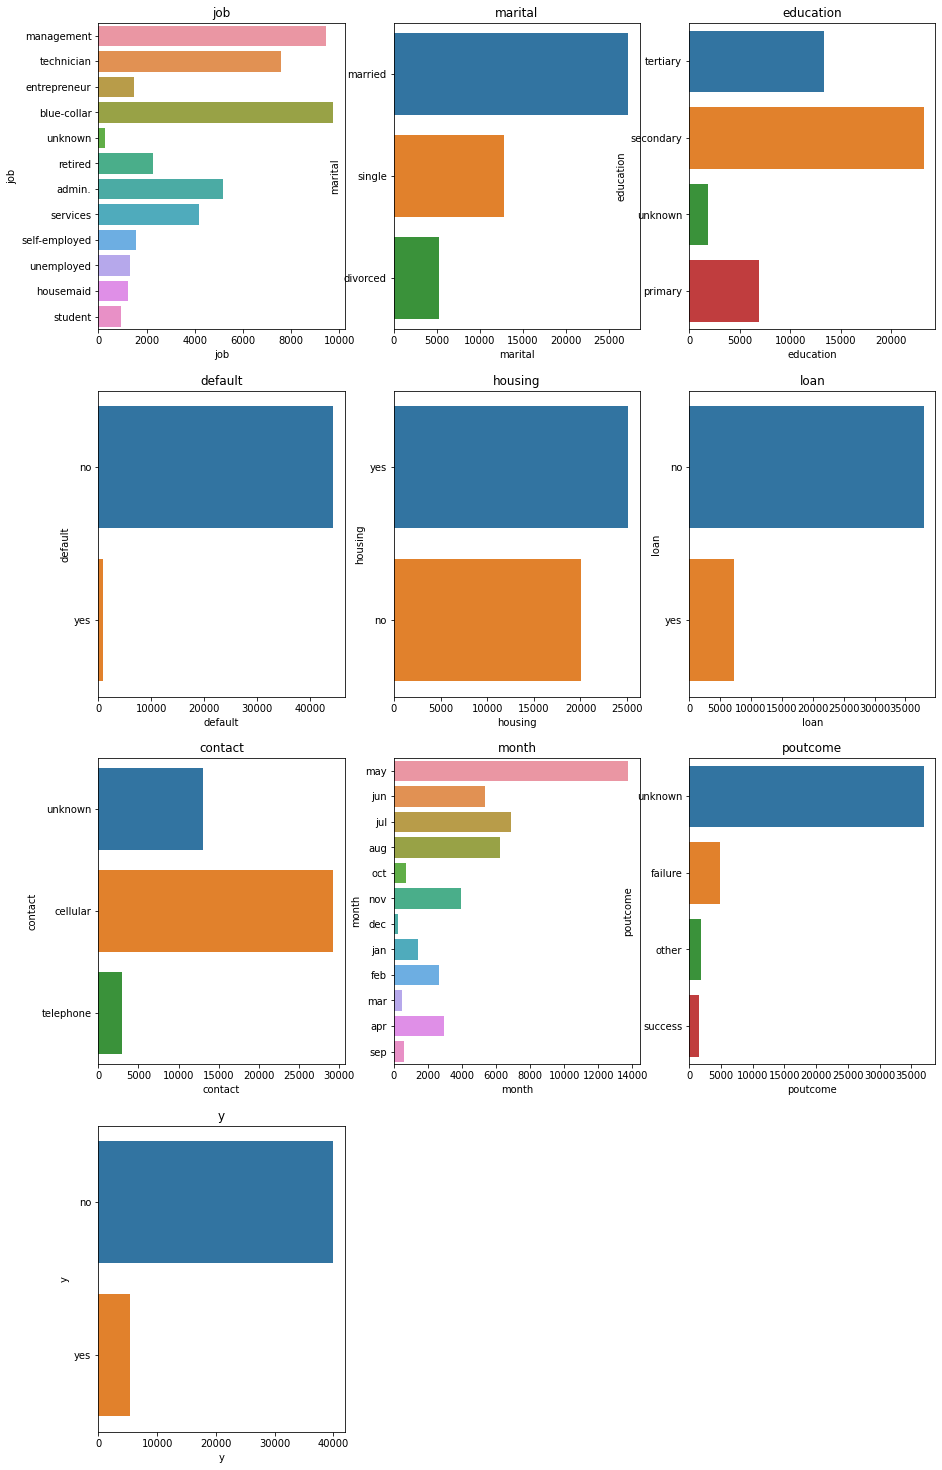

In [45]:
#check count on categorical features
plt.figure(figsize=(15,80))
plotnumber = 1
for categorical_feature in categorical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature,data=df)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+= 1
plt.show()  


### Management and blue-collar has the highest distribution and Housemaid and students has the lowest.

###We have maximum data of married people*

###Secondary and tertiory education background clients are highest in the dataset.

###Client who has no credit in default is maximum and who has is very low  near to 1 %.

###Client with No personal loan are more in dataset.

###Previous outcome is unknown in maximum cases might be the because there was no proper reason given for the same.

###We have maximum data available for the month of May, june, july and august and very less in Dec.

###Y which is our target variable : we can see there are more no results than yes.

###As it is classification problem and we have class imbalance which is the problem we have to solve this class imbalance before training model.

###**Relationship between Categorical feature and Target Variable**

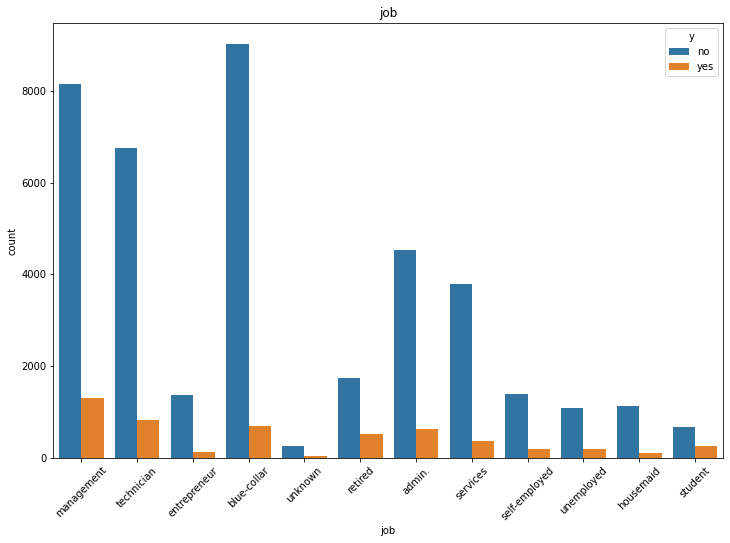

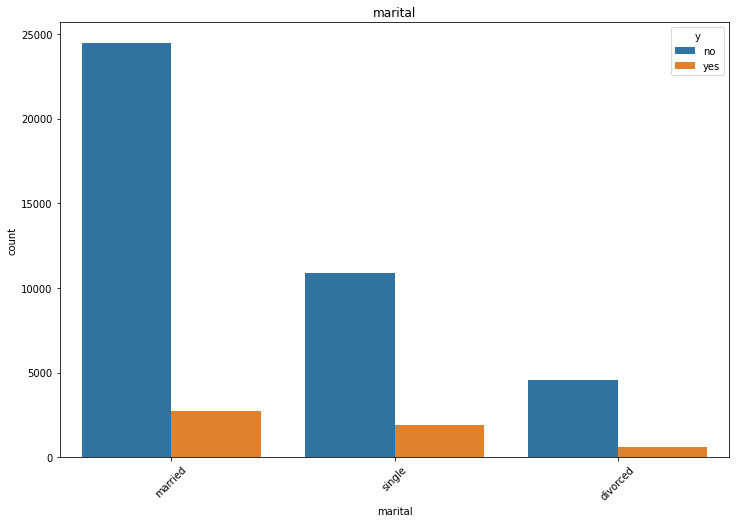

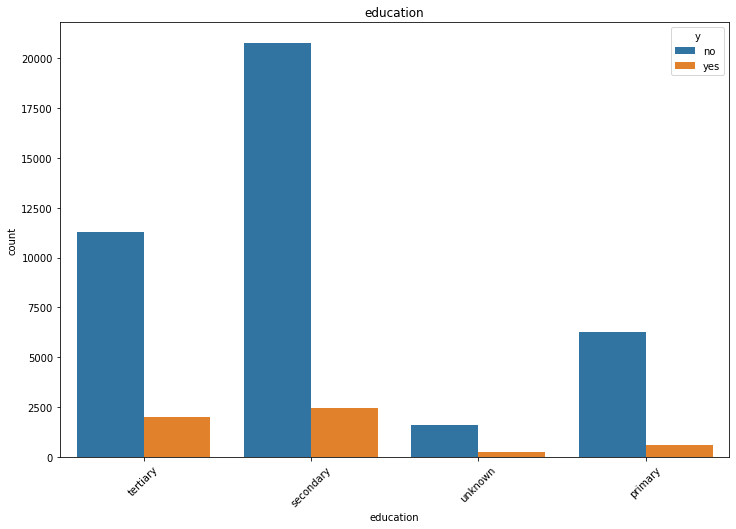

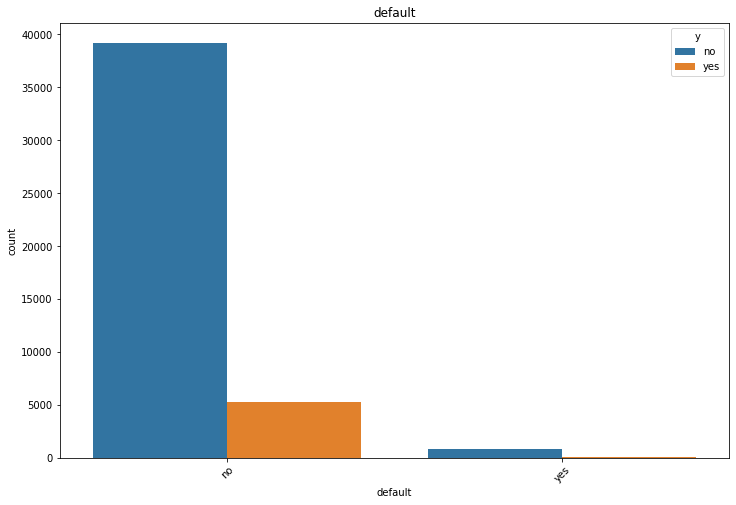

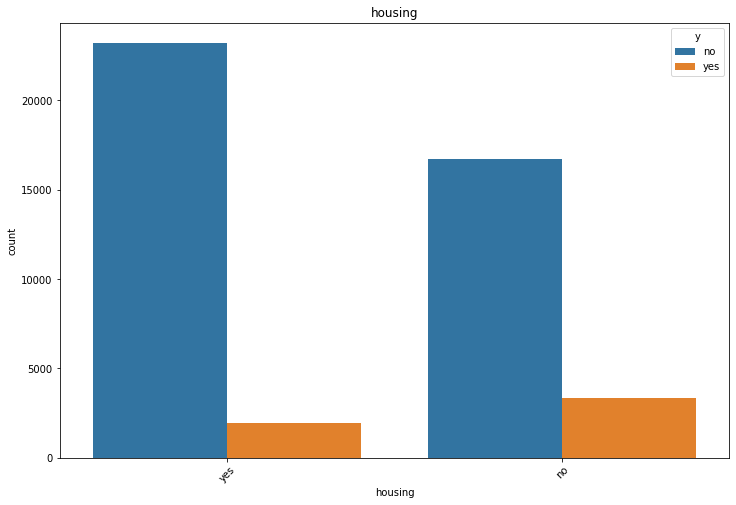

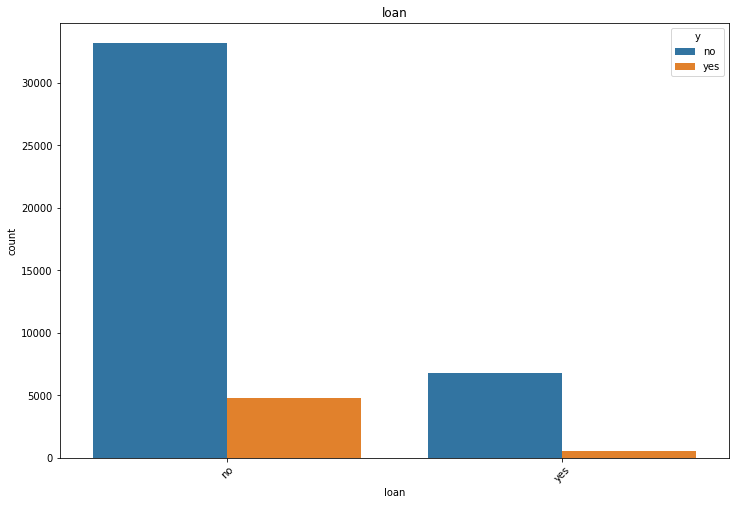

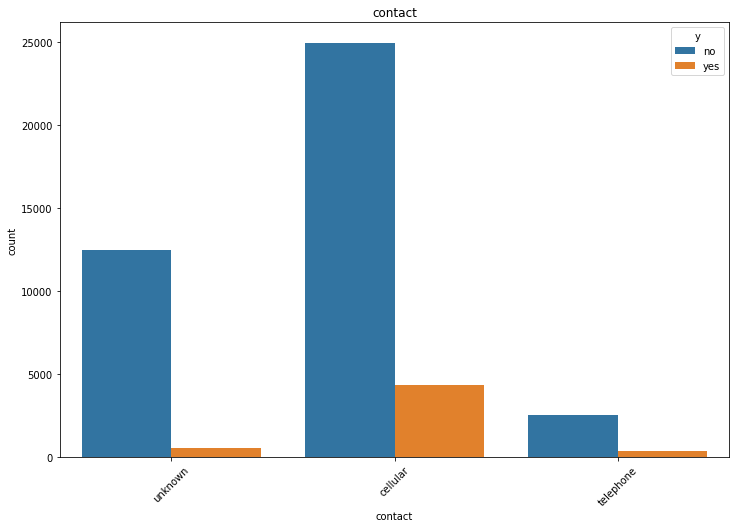

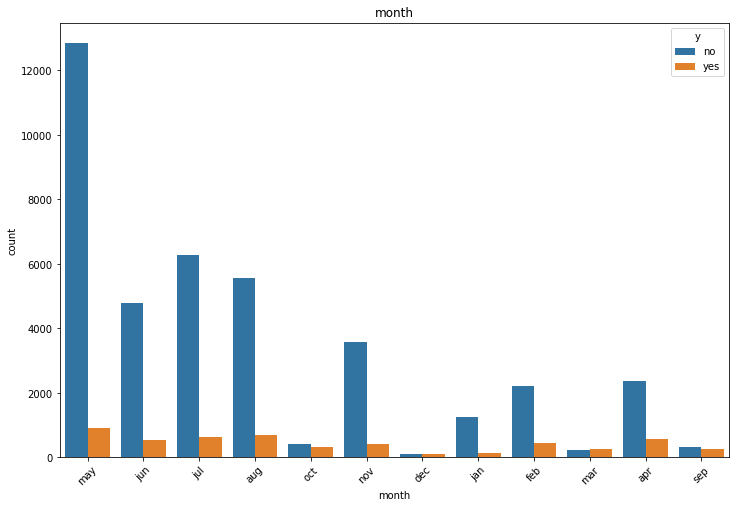

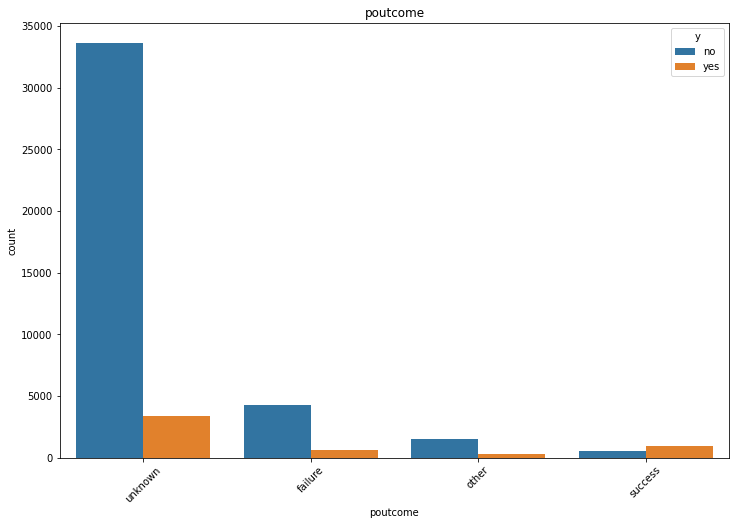

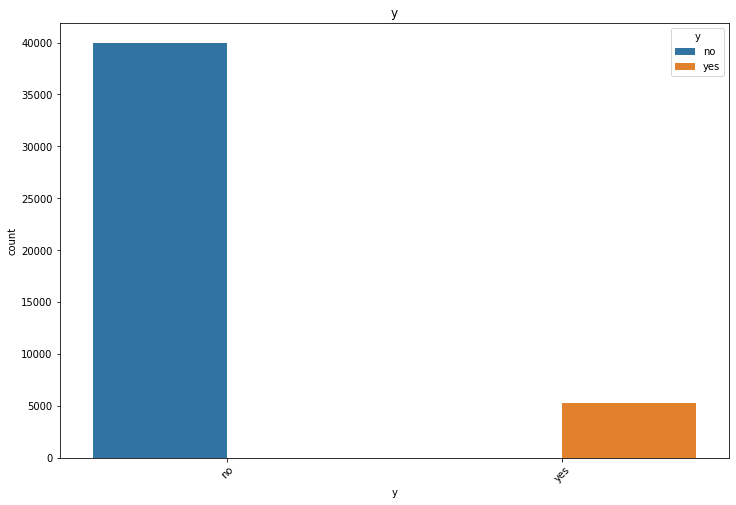

In [46]:
#now let's check relation between cat feature and outcome variable but first we have to drop our outcome variable from categorical columns
#cat_features= categorical_features.drop('y',axis=1)
for cat in categorical_features:
  plt.figure(figsize=(12,8))
  sns.countplot(cat,hue='y',data=df)
  plt.xlabel(cat)
  plt.xticks(rotation=45)
  plt.title(cat)

###Clients who has housing loan seems to be not interested much on deposit.
###If pre campagin outcome(i-e poutcome)=success then, there is high chance of client to show interest on term deposit.
###Married and Single have more intrest in deposite.
###Cellular communication is more effective in comparison to other communication types.

##**Analysis of Numerical Features**

In [47]:
#list of Numerical Variables
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O' )]
print('Number of Numerical variables:', len(numerical_features))

#Visualise the numerical variables
df[numerical_features].head()

Number of Numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


###There are 7 Numerical Features.

In [48]:
#find discrete numerical feature
dis_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("discrete variable count: {} ".format(len(dis_feature)))


discrete variable count: 0 



###There is no any discrete variable in given dataset.

In [49]:
#find contineous numerical feature
con_feature= [feature for feature in numerical_features if feature not in dis_feature+['y'] ]
print('contineous variable count:{}'.format(len(con_feature)))

contineous variable count:7



###There are 7 contineous variable in given dataset.

###**Distribution of data**

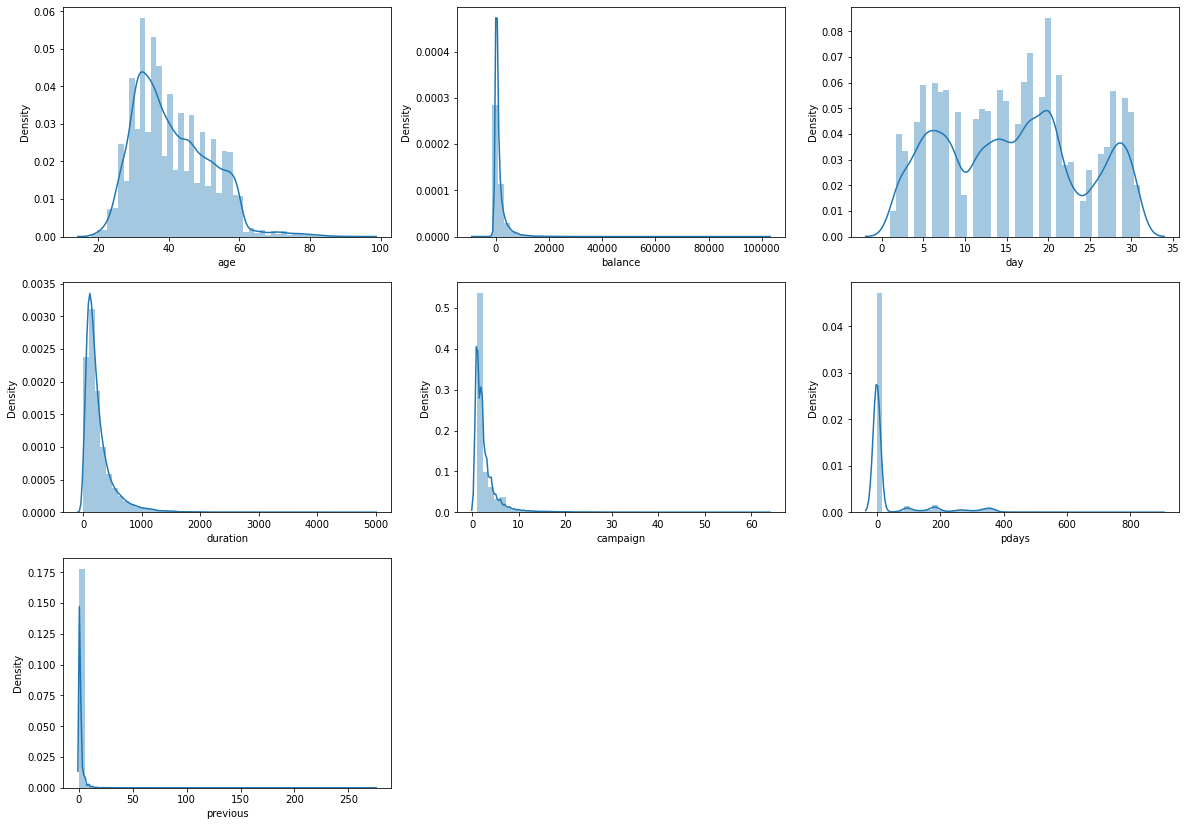

In [50]:
#plot a univariate distribution of observations
plt.figure(figsize=(20,60),facecolor='white')
plotnumber =1
for contineous_features in con_feature :
  ax = plt.subplot(12,3,plotnumber)
  sns.distplot(df[contineous_features])
  plt.xlabel(contineous_features)
  plotnumber+= 1
plt.show()  

###It seems age and days are Normally distributed.
###Balance, Duration, Campaign, pdays and previous are skewed towards right and seems to have some outliers.

###**Relation between Numerical feature  and Target Variable**

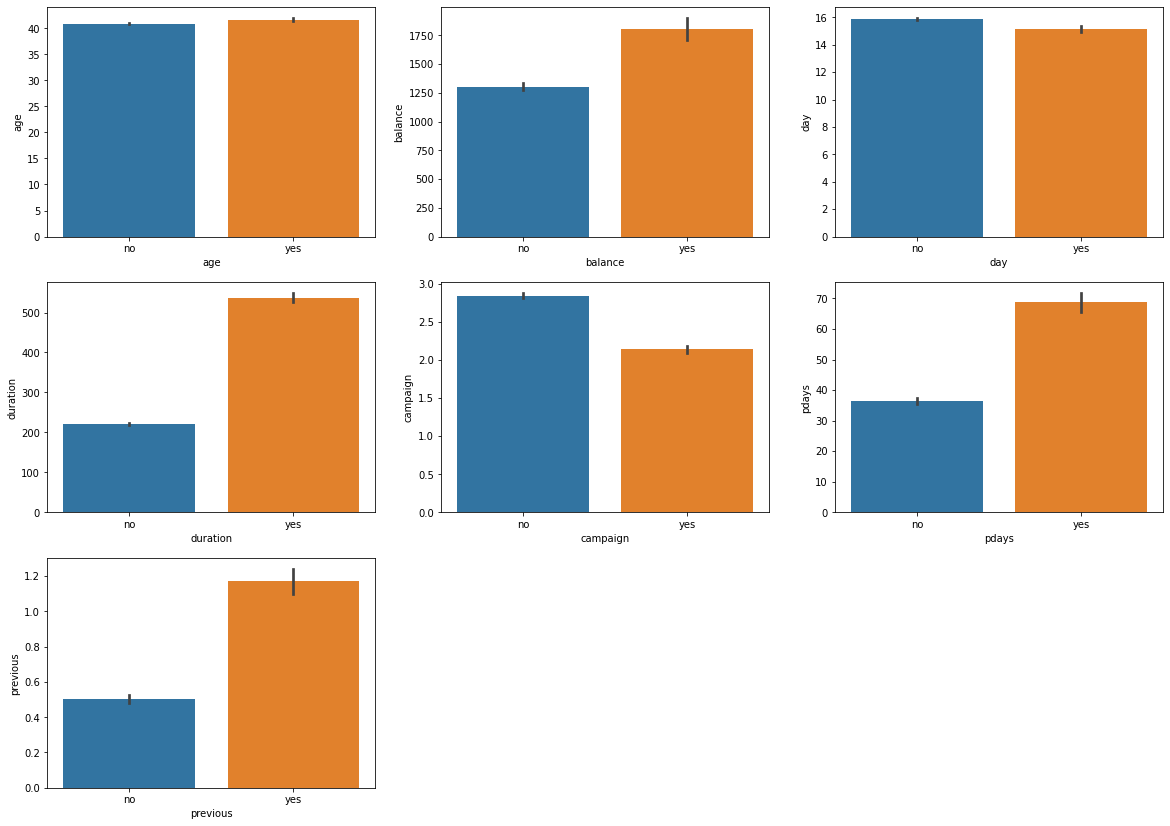

In [51]:
#Box plot to show target distribution with respect to numerical features.
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for feature in con_feature:
  ax = plt.subplot(12,3,plotnumber)
  sns.barplot(x="y", y= df[feature], data=df)
  plt.xlabel(feature)
  plotnumber+= 1
plt.show()  


###Client shows interest on response(term deposit) who had discussion for longer duration
###Calls with large duration has more tendency for conversion
###People were mostly contacted once but also some people also connect more number of time.

## **Analysis of Dependent variable:**

In [52]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

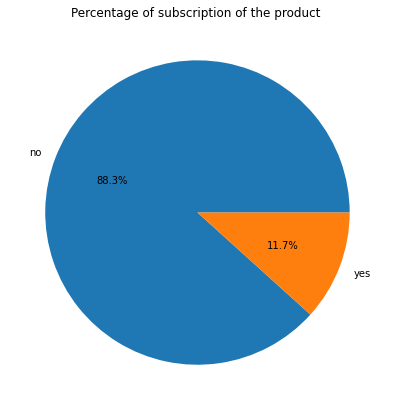

In [53]:
#visualize most preferred hotels
plt.figure(figsize=(7,7))
plt.pie(df['y'].value_counts(),labels = df['y'].value_counts().keys(),autopct = '%0.1f%%')
plt.title('Percentage of subscription of the product ');

In [54]:
#contain all  independent variabl
x=df.drop(['y'],axis=1)

#dependent variable
y=df['y']          


no     39922
yes     5289
Name: y, dtype: int64


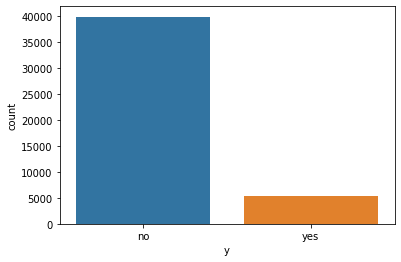

In [55]:
#plot graph
sns.countplot(x='y',data=df)
print(df['y'].value_counts())

###As it is classification problem and we have class imbalance which is the problem we have to solve this class imbalance before training model.

##***Correlation***

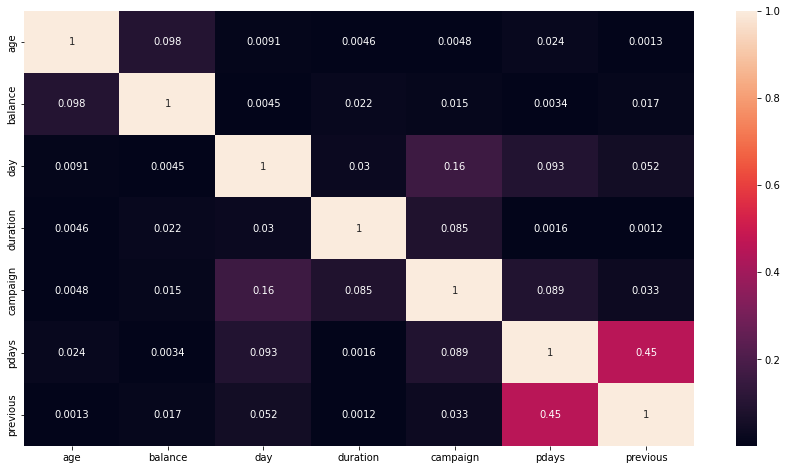

In [56]:
# Plotting correlation matrix
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr().abs(), annot=True,)

###There is no variable highly correlated.

## ***Outlier Treatment***

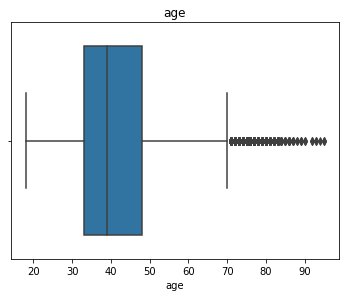

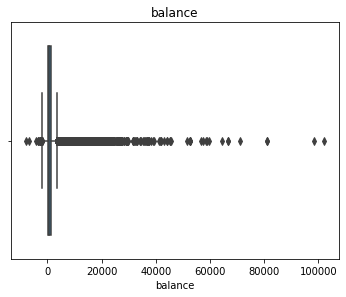

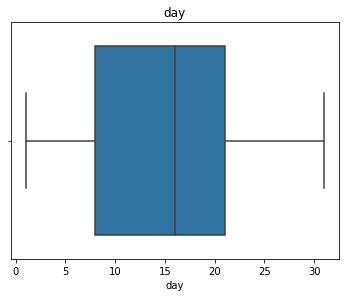

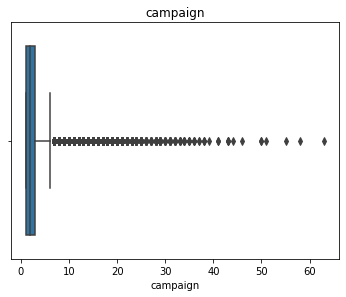

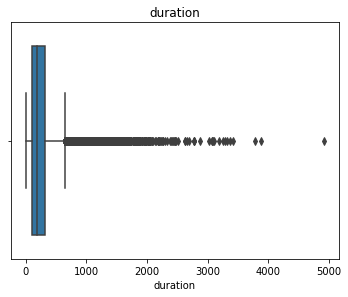

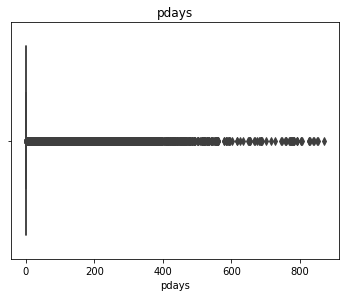

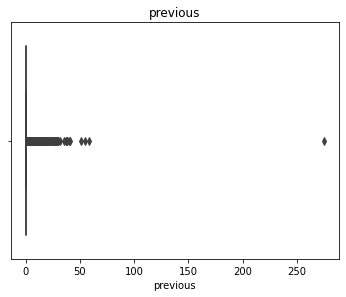

In [57]:
col=df[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()
  n=n+1

**Using Z score for outlier treatment**

In [58]:
from scipy import stats
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
data=df[(z<3).all(axis=1)]
data.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 17)

#**Prepairing Dataset for Modeling**

In [59]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
df.shape

(45211, 17)

In [61]:
#default features does not play imp role
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [62]:
df.drop(['default'],axis=1, inplace=True)

In [63]:
df.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [64]:
# drop pdays as it has -1 value for around 40%+ 
df.drop(['pdays'],axis=1, inplace=True)

## **Scaling and Label Encoding**


In [65]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [66]:
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   previous             45211 non-null  int64
 6   job_blue-collar      45211 non-null  uint8
 7   job_entrepreneur     45211 non-null  uint8
 8   job_housemaid        45211 non-null  uint8
 9   job_management       45211 non-null  uint8
 10  job_retired          45211 non-null  uint8
 11  job_self-employed    45211 non-null  uint8
 12  job_services         45211 non-null  uint8
 13  job_student          45211 non-null  uint8
 14  job_technician       45211 non-null  uint8
 15  job_unemployed       45211 non-null  uint8
 16  job_unknown          4

In [68]:
df.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [69]:
df.loc[11812]

age                     56
balance                  0
day                     20
duration               471
campaign                 2
previous                 0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
job_unknown              1
marital_married          1
marital_single           0
education_secondary      0
education_tertiary       0
education_unknown        1
contact_telephone        0
contact_unknown          1
month_aug                0
month_dec                0
month_feb                0
month_jan                0
month_jul                0
month_jun                1
month_mar                0
month_may                0
month_nov                0
month_oct                0
month_sep                0
poutcome_other           0
poutcome_success         0
p

## **Train Test Split**

In [70]:
X = df.drop(['y_new'],axis=1)
y = df['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(36168, 40)
(9043, 40)


##**Handling Imbalance data**

### **Oversampling using SMOTE**


In [71]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [72]:
print ('original dataset length',len(X))
print ('Resample dataset length',len(X_train_sm))

original dataset length 45211
Resample dataset length 63884


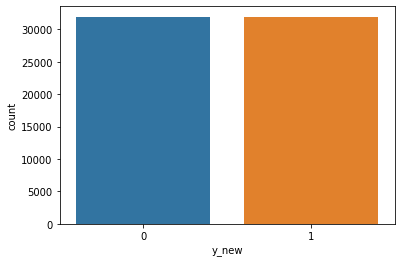

In [73]:
sns.countplot(y_train_sm)

## **Scaling on Data set**

In [74]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# **Implementing Various Machine learning Models**

## **1.Logistic Regression**

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logreg = LogisticRegression()

logreg.fit(X_train_sm, y_train_sm)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9294032934694133
Testing accuracy Score :  0.8790224483025545
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8050
           1       0.45      0.48      0.47       993

    accuracy                           0.88      9043
   macro avg       0.69      0.71      0.70      9043
weighted avg       0.88      0.88      0.88      9043



**ROC AOC Curve for Logistic Regression**

In [76]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

In [77]:
logreg_clf_probability = logreg.predict_proba(X_test)[:,1]

In [78]:
roc_socre=roc_auc_score(y_test, logreg_clf_probability)
roc_socre

0.8523312043042695

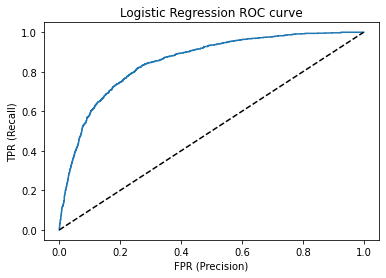

In [79]:
from sklearn.metrics import roc_curve
lg_fpr, lg_tpr, _ = roc_curve(y_test, logreg_clf_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(lg_fpr,lg_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## **2.Random Forest Classifier**

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_sm, y_train_sm)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8970474400088466
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8113
           1       0.50      0.57      0.53       930

    accuracy                           0.90      9043
   macro avg       0.72      0.75      0.74      9043
weighted avg       0.90      0.90      0.90      9043



**Confusion Matrix for Random Forest Classifier**

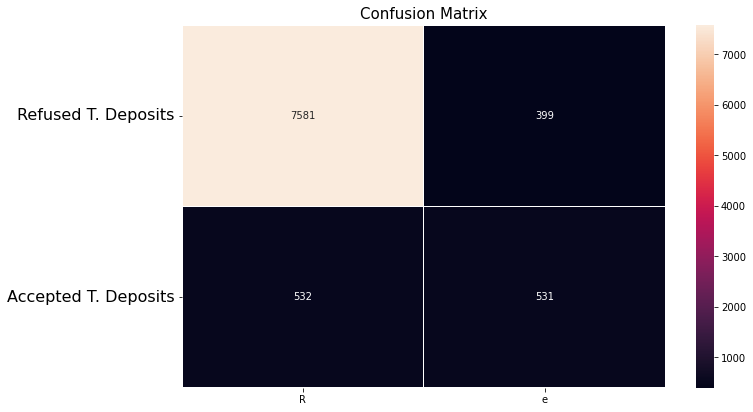

In [81]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,rf_prediction)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for Random Forest Classifier**

In [82]:
rf_clf_probability = rf_clf.predict_proba(X_test)[:,1]

In [83]:
roc_socre=roc_auc_score(y_test, rf_clf_probability)
roc_socre

0.9197965515859262

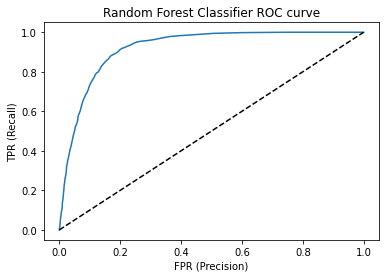

In [84]:
from sklearn.metrics import roc_curve
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rf_clf_probability)

plt.title('Random Forest Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(rfc_fpr,rfc_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Important Feature for Random Forest Classifier**

In [85]:
rf_clf.feature_importances_

array([0.0371406 , 0.04386532, 0.04249011, 0.24899372, 0.02285511,
       0.02079905, 0.0243832 , 0.00309982, 0.0037558 , 0.01154926,
       0.00393729, 0.0030995 , 0.00842492, 0.00192259, 0.01413279,
       0.00326741, 0.00063185, 0.03595672, 0.01639299, 0.01976576,
       0.01249348, 0.00395083, 0.00597921, 0.06098563, 0.03203744,
       0.00128618, 0.01337485, 0.01050937, 0.03115988, 0.01229151,
       0.00223972, 0.04155288, 0.02353897, 0.00313577, 0.00221689,
       0.00709616, 0.00536429, 0.06677522, 0.08070492, 0.01684298])

In [86]:
features = X.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

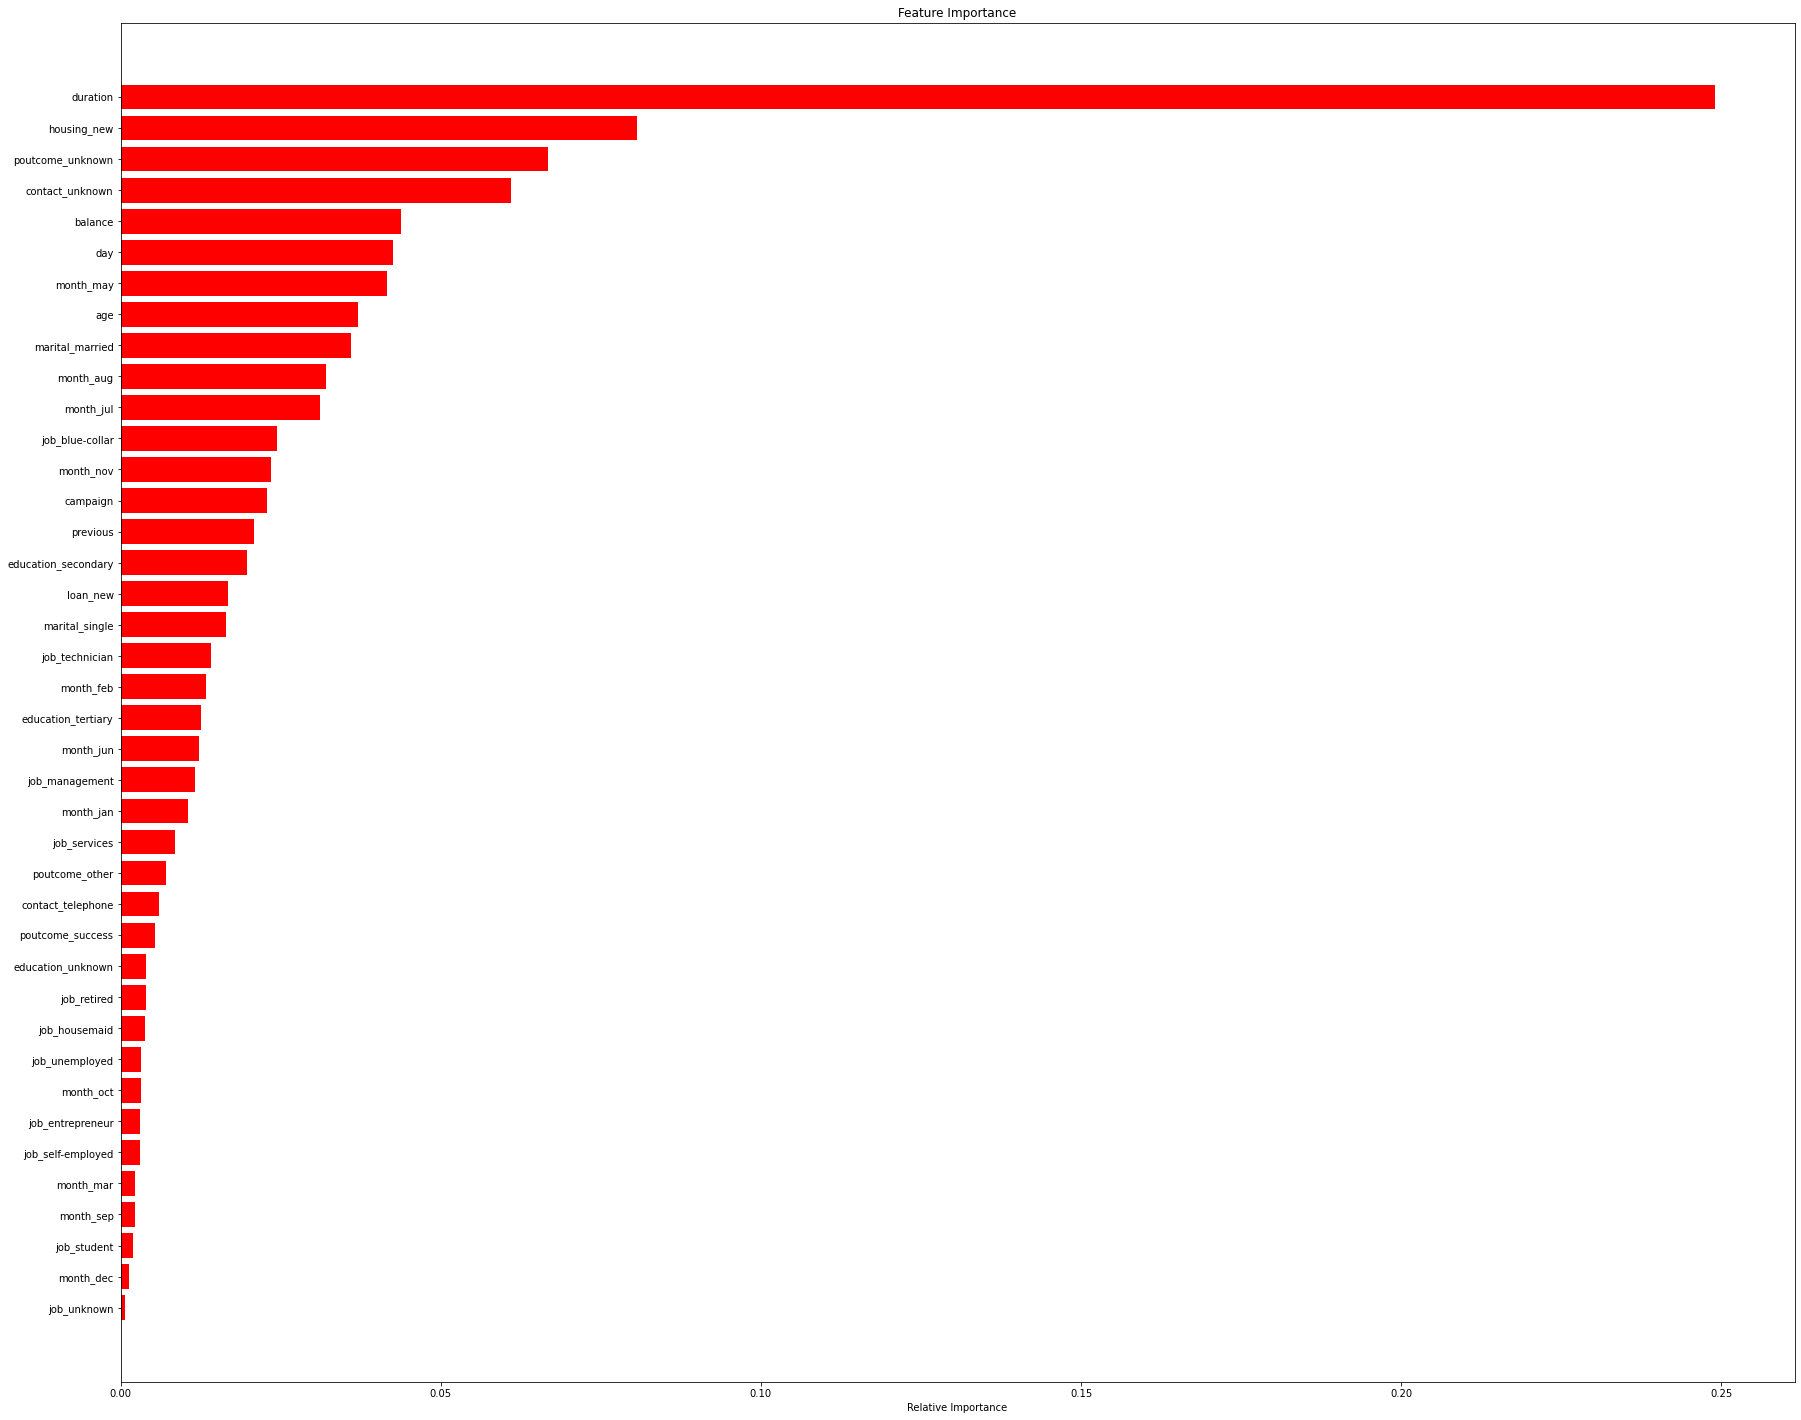

In [87]:
plt.figure(figsize=(30,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Hyperparameter Tuning**


Creating Dictionary Of hyperparameters

In [88]:
#Hyperparameter Grid
param_dict = {
     "n_estimators":[50,100,200,250],
    "max_depth":[5,10,15],
     'min_samples_split':[50,100,150,200],'min_samples_leaf':[40,50,60]}

In [89]:
param_dict

{'n_estimators': [50, 100, 200, 250],
 'max_depth': [5, 10, 15],
 'min_samples_split': [50, 100, 150, 200],
 'min_samples_leaf': [40, 50, 60]}

In [90]:
#implementating RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Creating an instance of the RandomForestClassifier
rf_clf = RandomForestClassifier()
#random search
random_rf = RandomizedSearchCV(estimator=rf_clf,param_distributions=param_dict,cv=5,verbose=2,scoring='roc_auc',n_iter=5,random_state=0)
random_rf.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   7.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   7.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   9.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   7.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   8.9s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   6.3s
[CV] END 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [40, 50, 60],
                                        'min_samples_split': [50, 100, 150,
                                                              200],
                                        'n_estimators': [50, 100, 200, 250]},
                   random_state=0, scoring='roc_auc', verbose=2)

In [91]:
#Best estimator for random forest
random_rf.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=40, min_samples_split=50)

In [92]:
random_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 50,
 'min_samples_leaf': 40,
 'max_depth': 15}

In [93]:
y_pred = random_rf.predict(X_test)

In [94]:
print(f'Train Accuracy={accuracy_score(y_train,random_rf.predict(X_train))}')
print(f'Test Accuracy={accuracy_score(y_test,y_pred)}')
print(classification_report(y_pred,y_test))

Train Accuracy=0.5251050652510506
Test Accuracy=0.8811235209554351
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7845
           1       0.56      0.49      0.52      1198

    accuracy                           0.88      9043
   macro avg       0.74      0.72      0.73      9043
weighted avg       0.88      0.88      0.88      9043



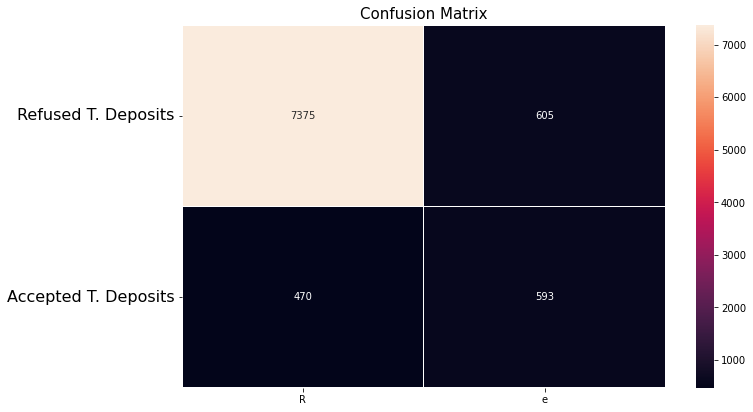

In [95]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for Random Forest Classifier After Hyperparameric Tuning**

In [96]:
random_rf_probability = random_rf.predict_proba(X_test)[:,1]

In [97]:
roc_socre=roc_auc_score(y_test, random_rf_probability)
roc_socre

0.900350947924845

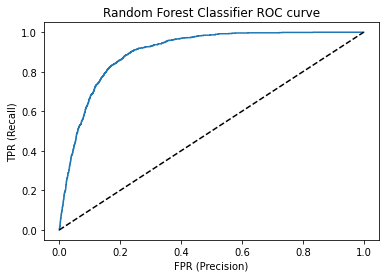

In [98]:
from sklearn.metrics import roc_curve
rrf_fpr, rrf_tpr, _ = roc_curve(y_test, random_rf_probability)

plt.title('Random Forest Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(rrf_fpr,rrf_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## **3.Decision Tree Classifier**

In [99]:
from sklearn.tree import DecisionTreeClassifier

modeldt = DecisionTreeClassifier()

modeldt.fit(X_train_sm, y_train_sm)
modelprediction = modeldt.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)


print("Training accuracy Score    : ",modeldt.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8612186221386708
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7809
           1       0.49      0.42      0.45      1234

    accuracy                           0.86      9043
   macro avg       0.70      0.68      0.69      9043
weighted avg       0.85      0.86      0.86      9043



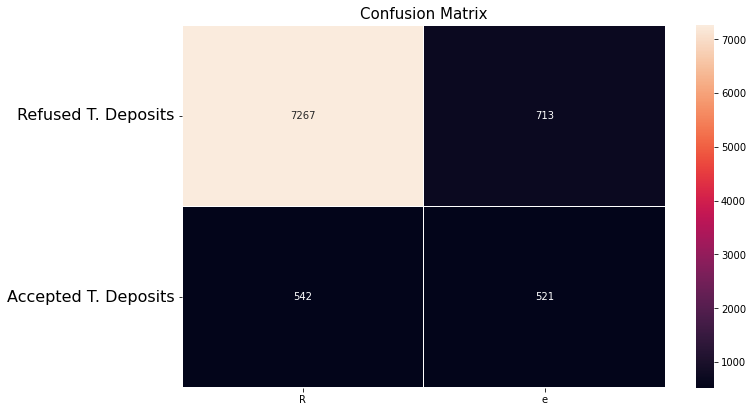

In [100]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, modelprediction)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for Decision Tree Classifier**

In [101]:
modeldt_probability = modeldt.predict_proba(X_test)[:,1]

In [102]:
roc_socre=roc_auc_score(y_test, modeldt_probability)
roc_socre

0.7003869622315431

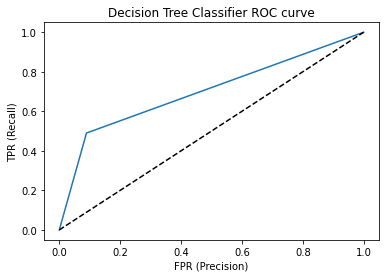

In [103]:
from sklearn.metrics import roc_curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, modeldt_probability)

plt.title('Decision Tree Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(dt_fpr,dt_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Important Feature for Decision Tree Classifier**

In [104]:
modeldt.feature_importances_

array([2.88974710e-02, 4.60015505e-02, 4.05180790e-02, 3.33737612e-01,
       2.06377716e-02, 1.69177358e-02, 5.71303138e-03, 1.37290399e-03,
       1.48533543e-03, 4.61090033e-03, 1.30682430e-03, 1.77467781e-03,
       2.89014281e-03, 1.22982504e-03, 4.97879857e-03, 1.67897205e-03,
       2.77869779e-04, 9.35387967e-03, 6.77737785e-03, 4.38515433e-03,
       4.25920234e-03, 2.09086606e-03, 2.95939266e-03, 9.80472123e-02,
       3.17437106e-02, 1.35958694e-03, 1.99313636e-02, 1.59673682e-02,
       3.22351442e-02, 5.67098917e-03, 2.54914679e-03, 1.38355817e-02,
       2.74926898e-02, 4.20492889e-03, 2.66012704e-03, 9.28335052e-03,
       4.88379216e-03, 8.76621802e-02, 9.46689609e-02, 3.94849243e-03])

In [105]:
features = X.columns
importances = modeldt.feature_importances_
indices = np.argsort(importances)

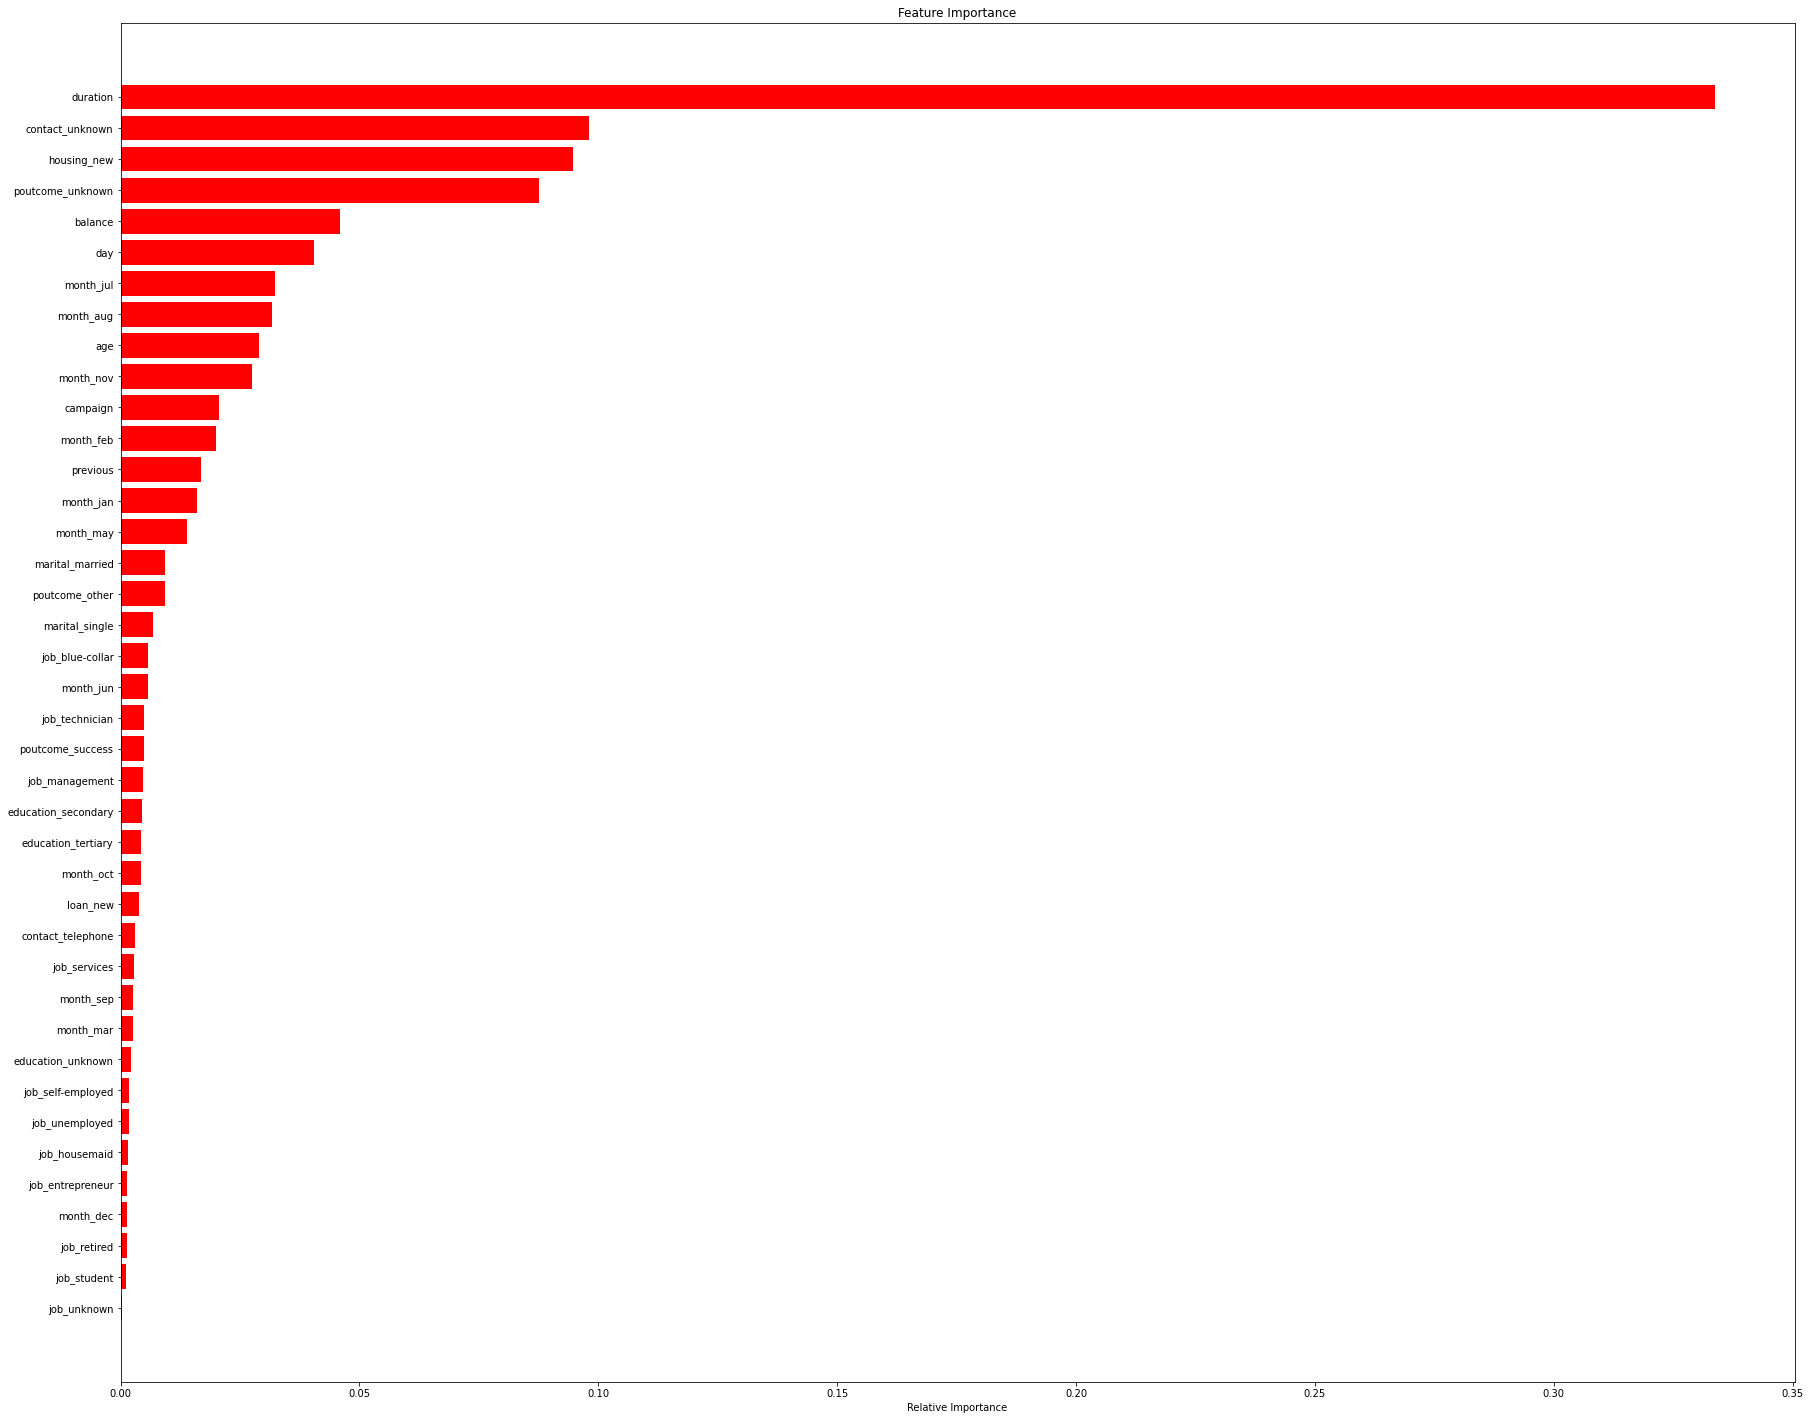

In [106]:
plt.figure(figsize=(30,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **4.Gradient Boosting Classifier**

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

clf.fit(X_train_sm, y_train_sm)
modelprediction = clf.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)

print("Training accuracy Score    : ",clf.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

Training accuracy Score    :  0.9319391396906894
Testing accuracy Score :  0.8816764348114564
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7976
           1       0.50      0.50      0.50      1067

    accuracy                           0.88      9043
   macro avg       0.72      0.71      0.72      9043
weighted avg       0.88      0.88      0.88      9043



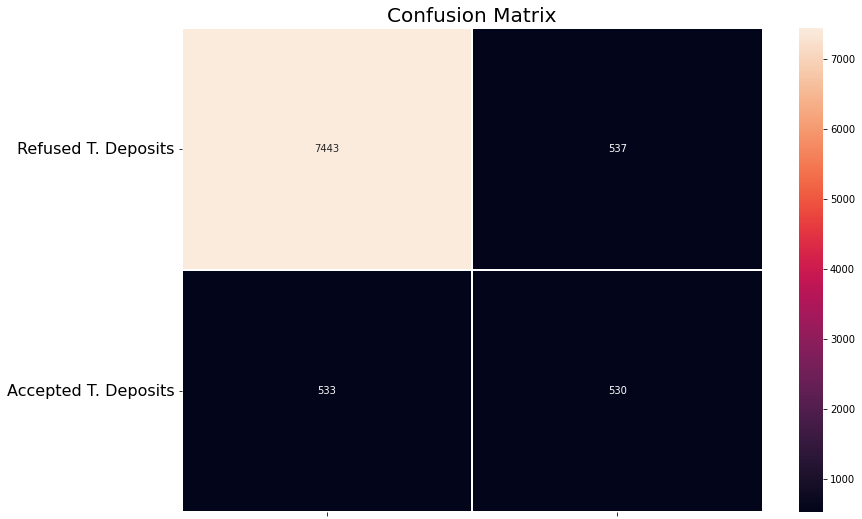

In [108]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, modelprediction)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for Gradient Boosting Classifier**

In [109]:
grb_probability = clf.predict_proba(X_test)[:,1]

In [110]:
roc_socre=roc_auc_score(y_test, grb_probability)
roc_socre

0.8778120630833905

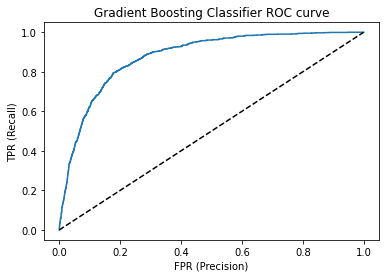

In [111]:
from sklearn.metrics import roc_curve
gb_fpr, gb_tpr, _ = roc_curve(y_test, grb_probability)

plt.title('Gradient Boosting Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(gb_fpr,gb_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [112]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()

model_KNN.fit(X_train_sm, y_train_sm)
modelprediction = model_KNN.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)

print("Training accuracy Score    : ",model_KNN.score(X_train_sm, y_train_sm))
print("Validation accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

Training accuracy Score    :  0.9409711351825183
Validation accuracy Score :  0.870728740462236
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8167
           1       0.36      0.44      0.40       876

    accuracy                           0.87      9043
   macro avg       0.65      0.68      0.66      9043
weighted avg       0.88      0.87      0.88      9043



**ROC AOC Curve for K Neighbors Classifier**

In [113]:
model_KNN_probability = model_KNN.predict_proba(X_test)[:,1]

In [114]:
roc_socre=roc_auc_score(y_test, model_KNN_probability)
roc_socre

0.767635987900136

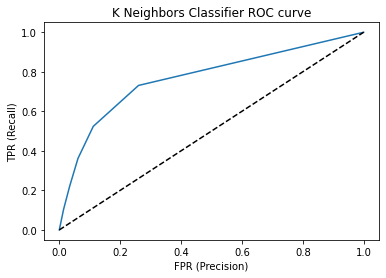

In [115]:
from sklearn.metrics import roc_curve
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, model_KNN_probability)

plt.title('K Neighbors Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(KNN_fpr,KNN_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()